# TFM

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Ejecución de código en GPU

In [2]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [3]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_data = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_data}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [4]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14135,45","-6225,0","5674,36","13584,81","13643,08","58,27","97,47",0
1,2,"13643,08","-6110,0","5651,04","13184,12","13209,35","25,23","66,88",0
2,3,"13209,35","-5945,0","6590,39","13854,74","13939,55","84,81","243,94",0
3,4,"13939,55","-5700,0","3570,5","11810,05","11885,71","75,66","307,38",0
4,5,"11885,71","-6020,0","7927,86","13793,57","13863,26","69,69","370,05",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"1076,84","-5011,92","3933,88","-1,2","3,92","5,12","324,3",1
4996,4997,"3,92","-3675,0","3952,96","281,88","352,37","70,49","323,2",1
4997,4998,"352,37","-3570,53","5582,72","2364,56","2471,66","107,1","339,93",1
4998,4999,"2471,66","-4813,12","3474,06","1132,6","1117,59","-15,01","310,83",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15615,82","-5775,0","8025,87","17866,69","17846,12","-20,57","222,15",0
1,2,"17846,12","-5655,0","6031,85","18222,97","18188,53","-34,44","143,43",0
2,3,"18188,53","-5765,0","6991,26","19414,79","19426,66","11,87","137,31",0
3,4,"19426,66","-6090,0","4872,59","18209,25","18345,39","136,14","248,3",0
4,5,"18345,39","-6385,0","6989,82","18950,21","18976,55","26,34","247,82",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"7,25","-0,0","0,0","7,25","12,68","5,43","1,73",1
4996,4997,"12,68","-0,0","0,0","12,68","3,55","-9,13","-1,1",1
4997,4998,"3,55","-0,0","0,0","3,55","23,94","20,39","16,87",1
4998,4999,"23,94","-0,0","0,0","23,94","2,41","-21,53","0,5",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"24563,12","-5685,0","3131,04","22009,16","21968,31","-40,85","-303,58",0
1,2,"21968,31","-5710,0","6010,17","22268,48","22211,99","-56,49","-367,43",0
2,3,"22211,99","-5980,0","4271,24","20503,23","20468,89","-34,34","-479,16",0
3,4,"20468,89","-6020,0","8860,36","23309,25","23378,07","68,82","-346,29",0
4,5,"23378,07","-5865,0","6020,14","23533,21","23572,93","39,72","-234,25",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"9,63","-0,0","0,0","9,63","1,18","-8,45","-18,01",1
4996,4997,"1,18","-0,0","0,0","1,18","5,14","3,96","4,12",1
4997,4998,"5,14","-0,0","0,0","5,14","4,99","-0,15","1,38",1
4998,4999,"4,99","-0,0","0,0","4,99","2,58","-2,41","-0,16",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16407,85","-6185,0","7792,67","18015,52","17891,49","-124,03","-115,5",0
1,2,"17891,49","-6285,0","7394,74","19001,23","18861,97","-139,26","-320,52",0
2,3,"18861,97","-6205,0","8695,9","21352,87","21434,18","81,31","-176,42",0
3,4,"21434,18","-5835,0","7959,03","23558,21","23591,7","33,49","-91,98",0
4,5,"23591,7","-5980,0","2844,37","20456,07","20443,09","-12,98","-64,35",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"18,59","-0,0","0,0","18,59","6,6","-11,99","6,04",1
4996,4997,"6,6","-0,0","0,0","6,6","15,32","8,72","6,28",1
4997,4998,"15,32","-0,0","0,0","15,32","16,23","0,91","5,59",1
4998,4999,"16,23","-0,0","0,0","16,23","1,64","-14,59","-15,95",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15107,28","-6230,0","7681,85","16559,13","16599,52","40,39","131,32",0
1,2,"16599,52","-5815,0","10012,13","20796,65","20793,22","-3,43","29,02",0
2,3,"20793,22","-5925,0","7005,04","21873,26","21881,93","8,67","134,01",0
3,4,"21881,93","-6280,0","7459,15","23061,08","23158,2","97,12","323,77",0
4,5,"23158,2","-6050,0","4070,43","21178,63","21114,52","-64,11","252,56",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"3,74","-0,0","0,0","3,74","3,79","0,05","-1,99",1
4996,4997,"3,79","-0,0","0,0","3,79","17,19","13,4","15,02",1
4997,4998,"17,19","-0,0","0,0","17,19","18,4","1,21","9,94",1
4998,4999,"18,4","-0,0","0,0","18,4","3,09","-15,31","-7,57",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22895,5","-5860,0","6301,31","23336,81","23325,16","-11,65","173,24",0
1,2,"23325,16","-6140,0","5663,87","22849,03","23008,27","159,24","350,93",0
2,3,"23008,27","-5985,0","3836,85","20860,12","20826,79","-33,33","429,98",0
3,4,"20826,79","-6010,0","5872,73","20689,52","20583,85","-105,67","364,91",0
4,5,"20583,85","-6130,0","5994,43","20448,28","20425,66","-22,62","270,54",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"0,74","-0,0","0,0","0,74","9,7","8,96","4,03",1
4996,4997,"9,7","-0,0","0,0","9,7","2,55","-7,15","-9,58",1
4997,4998,"2,55","-0,0","0,0","2,55","14,28","11,73","3,7",1
4998,4999,"14,28","-0,0","0,0","14,28","20,06","5,78","7,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20844,45","-6200,0","6979,13","21623,58","21623,16","-0,42","-150,21",0
1,2,"21623,16","-6405,0","2979,52","18197,68","18229,34","31,66","-28,87",0
2,3,"18229,34","-6350,0","8927,9","20807,24","20895,42","88,18","81,48",0
3,4,"20895,42","-6440,0","3962,6","18418,02","18490,74","72,72","133,97",0
4,5,"18490,74","-6325,0","7913,57","20079,31","20137,23","57,92","138,16",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"6,8","-0,0","0,0","6,8","15,9","9,1","6,89",1
4996,4997,"15,9","-0,0","0,0","15,9","2,9","-13,0","-5,17",1
4997,4998,"2,9","-0,0","0,0","2,9","12,73","9,83","6,68",1
4998,4999,"12,73","-0,0","0,0","12,73","19,26","6,53","14,76",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"13496,88","-6065,0","7051,23","14483,11","14426,45","-56,66","-296,42",0
1,2,"14426,45","-6005,0","7013,01","15434,46","15433,1","-1,36","-262,35",0
2,3,"15433,1","-5985,0","8949,6","18397,7","18453,49","55,79","-178,7",0
3,4,"18453,49","-5995,0","6911,23","19369,72","19460,37","90,65","36,4",0
4,5,"19460,37","-5925,0","6983,77","20519,14","20512,17","-6,97","106,85",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"6,27","-0,0","0,0","6,27","1,45","-4,82","-0,9",1
4996,4997,"1,45","-0,0","0,0","1,45","16,4","14,95","6,52",1
4997,4998,"16,4","-0,0","0,0","16,4","0,51","-15,89","-0,1",1
4998,4999,"0,51","-0,0","0,0","0,51","20,19","19,68","20,01",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21549,4","-6085,0","8112,49","23576,89","23569,77","-7,12","244,15",0
1,2,"23569,77","-5940,0","3714,14","21343,91","21332,77","-11,14","215,58",0
2,3,"21332,77","-6125,0","7289,12","22496,89","22520,93","24,04","295,76",0
3,4,"22520,93","-5835,0","6135,23","22821,16","22731,37","-89,79","290,67",0
4,5,"22731,37","-5645,0","4687,2","21773,57","21831,99","58,42","279,77",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"1,69","-0,0","0,0","1,69","4,59","2,9","0,77",1
4996,4997,"4,59","-0,0","0,0","4,59","5,07","0,48","-0,68",1
4997,4998,"5,07","-0,0","0,0","5,07","6,89","1,82","0,03",1
4998,4999,"6,89","-0,0","0,0","6,89","14,91","8,02","6,32",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"12701,48","-5815,0","8274,55","15161,03","15160,42","-0,61","368,23",0
1,2,"15160,42","-5885,0","5641,36","14916,78","15005,62","88,84","324,45",0
2,3,"15005,62","-6085,0","7443,93","16364,55","16391,28","26,73","328,1",0
3,4,"16391,28","-6285,0","7440,26","17546,54","17606,3","59,76","402,25",0
4,5,"17606,3","-5830,0","7664,36","19440,66","19532,41","91,75","503,52",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"2,94","-0,0","0,0","2,94","0,18","-2,76","-4,79",1
4996,4997,"0,18","-0,0","0,0","0,18","1,69","1,51","-8,02",1
4997,4998,"1,69","-0,0","0,0","1,69","3,82","2,13","-2,2",1
4998,4999,"3,82","-0,0","0,0","3,82","12,9","9,08","8,6",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16660,98","-5970,0","3006,84","13697,82","13689,7","-8,12","178,81",0
1,2,"13689,7","-5920,0","5978,85","13748,55","13762,89","14,34","176,15",0
2,3,"13762,89","-6180,0","8026,7","15609,59","15580,0","-29,59","99,0",0
3,4,"15580,0","-6280,0","6897,71","16197,71","16301,01","103,3","171,11",0
4,5,"16301,01","-6245,0","8937,61","18993,62","19072,32","78,7","282,72",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"1,81","-0,0","0,0","1,81","0,07","-1,74","-0,32",1
4996,4997,"0,07","-0,0","0,0","0,07","20,23","20,16","4,52",1
4997,4998,"20,23","-0,0","0,0","20,23","11,06","-9,17","5,81",1
4998,4999,"11,06","-0,0","0,0","11,06","7,57","-3,49","4,74",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19920,48","-5805,0","4015,35","18130,83","18098,28","-32,55","-190,9",0
1,2,"18098,28","-5745,0","5982,58","18335,86","18349,19","13,33","-142,35",0
2,3,"18349,19","-5770,0","4075,57","16654,76","16708,13","53,37","-100,35",0
3,4,"16708,13","-6170,0","7838,37","18376,5","18412,97","36,47","-100,4",0
4,5,"18412,97","-6095,0","5381,5","17699,47","17708,97","9,5","-28,62",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"18,06","-0,0","0,0","18,06","10,44","-7,62","10,08",1
4996,4997,"10,44","-0,0","0,0","10,44","1,23","-9,21","-5,34",1
4997,4998,"1,23","-0,0","0,0","1,23","5,44","4,21","-9,58",1
4998,4999,"5,44","-0,0","0,0","5,44","22,09","16,65","21,38",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22693,92","-6385,0","7342,26","23651,18","23688,38","37,2","129,01",0
1,2,"23688,38","-6120,0","3760,57","21328,95","21386,05","57,1","226,39",0
2,3,"21386,05","-5955,0","8519,94","23950,99","24012,24","61,25","255,63",0
3,4,"24012,24","-5960,0","3659,44","21711,68","21705,36","-6,32","206,81",0
4,5,"21705,36","-5640,0","6929,0","22994,36","23127,06","132,7","256,02",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"2,87","-0,0","0,0","2,87","6,4","3,53","-2,04",1
4996,4997,"6,4","-0,0","0,0","6,4","0,49","-5,91","-0,66",1
4997,4998,"0,49","-0,0","0,0","0,49","10,51","10,02","-0,65",1
4998,4999,"10,51","-0,0","0,0","10,51","14,41","3,9","14,02",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19733,1","-5835,0","10098,8","23996,9","24001,82","4,92","239,18",0
1,2,"24001,82","-6085,0","3548,57","21465,39","21469,62","4,23","127,63",0
2,3,"21469,62","-5970,0","6880,76","22380,38","22439,97","59,59","58,46",0
3,4,"22439,97","-5895,0","3012,37","19557,34","19542,05","-15,29","72,07",0
4,5,"19542,05","-6295,0","6960,82","20207,87","20235,45","27,58","175,97",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"1,86","-0,0","0,0","1,86","4,2","2,34","-1,06",1
4996,4997,"4,2","-0,0","0,0","4,2","5,82","1,62","1,89",1
4997,4998,"5,82","-0,0","0,0","5,82","10,16","4,34","7,12",1
4998,4999,"10,16","-0,0","0,0","10,16","10,92","0,76","7,46",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15873,34","-5805,0","7912,42","17980,76","18088,29","107,53","197,75",0
1,2,"18088,29","-5635,0","5631,26","18084,55","18049,41","-35,14","135,42",0
2,3,"18049,41","-5795,0","7478,38","19732,79","19646,49","-86,3","13,12",0
3,4,"19646,49","-5770,0","7920,88","21797,37","21874,27","76,9","21,98",0
4,5,"21874,27","-6220,0","6613,26","22267,53","22242,69","-24,84","48,48",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"14,68","-0,0","0,0","14,68","3,07","-11,61","-10,31",1
4996,4997,"3,07","-0,0","0,0","3,07","3,4","0,33","0,67",1
4997,4998,"3,4","-0,0","0,0","3,4","1,04","-2,36","-3,81",1
4998,4999,"1,04","-0,0","0,0","1,04","0,98","-0,06","-5,97",1


### Conjunto de datos de prueba

In [5]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17513,75","-5795,0","7617,9","19336,65","19346,07","9,42","-45,15",0
1,2,"19346,07","-6145,0","6256,88","19457,95","19563,26","105,31","28,86",0
2,3,"19563,26","-6160,0","6947,69","20350,95","20405,05","54,1","66,95",0
3,4,"20405,05","-5965,0","6865,32","21305,37","21436,23","130,86","274,85",0
4,5,"21436,23","-6110,0","6061,72","21387,95","21350,08","-37,87","253,98",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"2374,7","-5424,88","3298,28","248,1","337,76","89,66","-159,64",1
4996,4997,"337,76","-4131,99","3892,47","98,24","158,03","59,79","-131,51",1
4997,4998,"158,03","-5458,4","5240,33","-60,04","8,68","68,72","-82,85",1
4998,4999,"8,68","-4149,51","5216,75","1075,92","1169,18","93,26","163,33",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16117,63","-5800,0","8101,31","18418,94","18330,97","-87,97","-11,26",0
1,2,"18330,97","-6500,0","7959,35","19790,32","19844,61","54,29","114,06",0
2,3,"19844,61","-5870,0","7065,9","21040,51","20971,2","-69,31","34,42",0
3,4,"20971,2","-5845,0","7053,31","22179,51","22069,77","-109,74","-91,53",0
4,5,"22069,77","-5940,0","5972,74","22102,51","22166,94","64,43","-122,92",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"0,22","-0,0","0,0","0,22","12,43","12,21","4,23",1
4996,4997,"12,43","-0,0","0,0","12,43","4,93","-7,5","3,8",1
4997,4998,"4,93","-0,0","0,0","4,93","1,11","-3,82","-7,54",1
4998,4999,"1,11","-0,0","0,0","1,11","11,79","10,68","8,82",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21407,49","-5770,0","6437,71","22075,2","22149,27","74,07","450,14",0
1,2,"22149,27","-6055,0","6890,59","22984,86","23004,21","19,35","442,39",0
2,3,"23004,21","-6065,0","6045,86","22985,07","22970,69","-14,38","435,99",0
3,4,"22970,69","-6185,0","6647,21","23432,9","23451,31","18,41","392,54",0
4,5,"23451,31","-5840,0","3004,15","20615,46","20603,29","-12,17","290,42",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"7,24","-0,0","0,0","7,24","12,6","5,36","2,27",1
4996,4997,"12,6","-0,0","0,0","12,6","10,45","-2,15","8,18",1
4997,4998,"10,45","-0,0","0,0","10,45","6,5","-3,95","-7,56",1
4998,4999,"6,5","-0,0","0,0","6,5","2,57","-3,93","-2,79",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20849,59","-6320,0","7001,07","21530,66","21535,26","4,6","222,94",0
1,2,"21535,26","-5950,0","6930,79","22516,05","22614,69","98,64","272,89",0
2,3,"22614,69","-5780,0","5848,25","22682,94","22665,78","-17,16","243,48",0
3,4,"22665,78","-6345,0","5564,88","21885,66","21960,97","75,31","293,25",0
4,5,"21960,97","-6085,0","5321,38","21197,35","21216,59","19,24","320,67",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"2,27","-0,0","0,0","2,27","3,98","1,71","2,71",1
4996,4997,"3,98","-0,0","0,0","3,98","7,48","3,5","-17,02",1
4997,4998,"7,48","-0,0","0,0","7,48","6,1","-1,38","1,73",1
4998,4999,"6,1","-0,0","0,0","6,1","0,61","-5,49","-1,23",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20283,62","-6005,0","6529,19","20807,81","20833,02","25,21","117,23",0
1,2,"20833,02","-5670,0","6672,35","21835,37","21899,82","64,45","130,11",0
2,3,"21899,82","-5980,0","6585,39","22505,21","22499,82","-5,39","239,37",0
3,4,"22499,82","-5830,0","4505,56","21175,38","21144,17","-31,21","168,29",0
4,5,"21144,17","-6025,0","6564,27","21683,44","21652,99","-30,45","113,28",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"5,98","-0,0","0,0","5,98","7,6","1,62","-8,8",1
4996,4997,"7,6","-0,0","0,0","7,6","2,33","-5,27","-1,47",1
4997,4998,"2,33","-0,0","0,0","2,33","1,5","-0,83","-11,86",1
4998,4999,"1,5","-0,0","0,0","1,5","11,0","9,5","1,07",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19358,29","-6375,0","4461,86","17445,15","17534,55","89,4","344,74",0
1,2,"17534,55","-6000,0","8920,15","20454,7","20523,64","68,94","454,44",0
2,3,"20523,64","-6085,0","3969,73","18408,37","18456,58","48,21","386,29",0
3,4,"18456,58","-5795,0","7013,43","19675,01","19654,94","-20,07","334,77",0
4,5,"19654,94","-5695,0","4742,24","18702,18","18698,06","-4,12","378,0",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"6,37","-0,0","0,0","6,37","8,09","1,72","-1,17",1
4996,4997,"8,09","-0,0","0,0","8,09","0,95","-7,14","-13,07",1
4997,4998,"0,95","-0,0","0,0","0,95","15,5","14,55","7,14",1
4998,4999,"15,5","-0,0","0,0","15,5","4,29","-11,21","-10,01",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21091,15","-6275,0","6023,48","20839,63","20810,27","-29,36","86,97",0
1,2,"20810,27","-6065,0","5996,5","20741,77","20730,49","-11,28","105,95",0
2,3,"20730,49","-6020,0","7033,07","21743,56","21730,26","-13,3","49,64",0
3,4,"21730,26","-5985,0","7991,46","23736,72","23706,95","-29,77","-25,43",0
4,5,"23706,95","-6265,0","5895,49","23337,44","23309,72","-27,72","-107,24",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"10,51","-0,0","0,0","10,51","5,05","-5,46","-7,42",1
4996,4997,"5,05","-0,0","0,0","5,05","6,28","1,23","5,05",1
4997,4998,"6,28","-0,0","0,0","6,28","4,16","-2,12","-2,99",1
4998,4999,"4,16","-0,0","0,0","4,16","11,97","7,81","3,78",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16127,42","-6000,0","8008,22","18135,64","18101,13","-34,51","294,5",0
1,2,"18101,13","-5620,0","5807,79","18288,92","18316,3","27,38","350,09",0
2,3,"18316,3","-5815,0","7159,39","19660,69","19679,03","18,34","311,15",0
3,4,"19679,03","-5840,0","6016,42","19855,45","19833,64","-21,81","195,68",0
4,5,"19833,64","-5975,0","8965,75","22824,39","22872,52","48,13","287,02",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"9,28","-0,0","0,0","9,28","3,34","-5,94","-4,91",1
4996,4997,"3,34","-0,0","0,0","3,34","1,11","-2,23","-17,27",1
4997,4998,"1,11","-0,0","0,0","1,11","16,92","15,81","12,28",1
4998,4999,"16,92","-0,0","0,0","16,92","20,94","4,02","12,94",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18353,66","-5910,0","9567,79","22011,45","22047,52","36,07","247,87",0
1,2,"22047,52","-5915,0","6066,65","22199,17","22253,5","54,33","248,86",0
2,3,"22253,5","-6315,0","8596,95","24535,45","24571,84","36,39","342,01",0
3,4,"24571,84","-6210,0","3265,21","21627,05","21697,36","70,31","396,76",0
4,5,"21697,36","-5775,0","3912,98","19835,34","19810,86","-24,48","323,27",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"23,81","-0,0","0,0","23,81","11,74","-12,07","8,7",1
4996,4997,"11,74","-0,0","0,0","11,74","5,08","-6,66","-7,09",1
4997,4998,"5,08","-0,0","0,0","5,08","4,48","-0,6","-10,12",1
4998,4999,"4,48","-0,0","0,0","4,48","16,89","12,41","10,69",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19135,51","-6390,0","5915,74","18661,25","18731,92","70,67","45,03",0
1,2,"18731,92","-5980,0","5370,19","18122,11","18178,63","56,52","131,9",0
2,3,"18178,63","-6255,0","4718,96","16642,59","16499,85","-142,74","75,7",0
3,4,"16499,85","-6050,0","7024,98","17474,83","17445,94","-28,89","24,4",0
4,5,"17445,94","-6140,0","6937,31","18243,25","18275,54","32,29","88,25",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"2,96","-0,0","0,0","2,96","14,84","11,88","13,75",1
4996,4997,"14,84","-0,0","0,0","14,84","0,27","-14,57","-11,33",1
4997,4998,"0,27","-0,0","0,0","0,27","15,27","15,0","-3,86",1
4998,4999,"15,27","-0,0","0,0","15,27","6,99","-8,28","-7,18",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20193,92","-5850,0","9913,39","24257,31","24311,42","54,11","84,7",0
1,2,"24311,42","-6040,0","3850,26","22121,68","22108,92","-12,76","66,14",0
2,3,"22108,92","-5900,0","5883,81","22092,73","22078,15","-14,58","40,47",0
3,4,"22078,15","-5815,0","4430,67","20693,82","20674,74","-19,08","-32,29",0
4,5,"20674,74","-5950,0","8540,19","23264,93","23215,08","-49,85","-188,04",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"10,54","-0,0","0,0","10,54","10,8","0,26","-5,63",1
4996,4997,"10,8","-0,0","0,0","10,8","6,45","-4,35","-14,33",1
4997,4998,"6,45","-0,0","0,0","6,45","3,24","-3,21","-4,49",1
4998,4999,"3,24","-0,0","0,0","3,24","15,39","12,15","11,02",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"12213,32","-5875,0","10672,89","17011,21","17089,22","78,01","99,27",0
1,2,"17089,22","-6040,0","10835,12","21884,34","22027,88","143,54","127,1",0
2,3,"22027,88","-6060,0","6670,77","22638,65","22608,2","-30,45","69,29",0
3,4,"22608,2","-6435,0","6922,44","23095,64","23151,8","56,16","138,38",0
4,5,"23151,8","-6220,0","7437,61","24369,41","24485,09","115,68","247,22",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"3,37","-0,0","0,0","3,37","9,61","6,24","-10,45",1
4996,4997,"9,61","-0,0","0,0","9,61","9,43","-0,18","8,36",1
4997,4998,"9,43","-0,0","0,0","9,43","5,25","-4,18","-8,73",1
4998,4999,"5,25","-0,0","0,0","5,25","11,49","6,24","-11,95",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22121,8","-6215,0","7126,68","23033,48","23014,29","-19,19","76,23",0
1,2,"23014,29","-5770,0","4410,06","21654,35","21727,33","72,98","168,44",0
2,3,"21727,33","-5925,0","5618,01","21420,34","21380,96","-39,38","124,78",0
3,4,"21380,96","-5985,0","6609,42","22005,38","21974,33","-31,05","91,84",0
4,5,"21974,33","-5760,0","7397,68","23612,01","23720,74","108,73","203,88",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"3,52","-0,0","0,0","3,52","12,77","9,25","7,87",1
4996,4997,"12,77","-0,0","0,0","12,77","5,81","-6,96","1,42",1
4997,4998,"5,81","-0,0","0,0","5,81","11,97","6,16","9,16",1
4998,4999,"11,97","-0,0","0,0","11,97","3,14","-8,83","-4,08",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14638,16","-6115,0","10940,94","19464,1","19505,22","41,12","236,38",0
1,2,"19505,22","-6115,0","6690,17","20080,39","20139,11","58,72","296,59",0
2,3,"20139,11","-5850,0","3274,58","17563,69","17550,2","-13,49","251,88",0
3,4,"17550,2","-6460,0","7113,49","18203,69","18088,62","-115,07","126,83",0
4,5,"18088,62","-6200,0","7964,14","19852,76","19880,11","27,35","258,71",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"0,67","-0,0","0,0","0,67","1,2","0,53","0,68",1
4996,4997,"1,2","-0,0","0,0","1,2","6,47","5,27","6,47",1
4997,4998,"6,47","-0,0","0,0","6,47","9,21","2,74","7,67",1
4998,4999,"9,21","-0,0","0,0","9,21","14,18","4,97","0,31",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17619,43","-5805,0","8561,36","20375,79","20398,92","23,13","215,81",0
1,2,"20398,92","-6025,0","9496,63","23870,55","24003,71","133,16","329,32",0
2,3,"24003,71","-6035,0","3276,54","21245,25","21295,59","50,34","366,79",0
3,4,"21295,59","-5805,0","6207,64","21698,23","21703,88","5,65","343,05",0
4,5,"21703,88","-5835,0","5986,12","21855,0","21923,71","68,71","425,75",0
...,...,...,...,...,...,...,...,...,...
4995,4996,"4,09","-0,0","0,0","4,09","1,67","-2,42","-12,58",1
4996,4997,"1,67","-0,0","0,0","1,67","2,82","1,15","-14,31",1
4997,4998,"2,82","-0,0","0,0","2,82","16,35","13,53","8,0",1
4998,4999,"16,35","-0,0","0,0","16,35","7,34","-9,01","4,11",1


## Limpieza de datos

In [6]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [7]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14135.45,"-6225,0",5674.36,13584.81,13643.08,58.27,97.47,0
1,2,13643.08,"-6110,0",5651.04,13184.12,13209.35,25.23,66.88,0
2,3,13209.35,"-5945,0",6590.39,13854.74,13939.55,84.81,243.94,0
3,4,13939.55,"-5700,0",3570.50,11810.05,11885.71,75.66,307.38,0
4,5,11885.71,"-6020,0",7927.86,13793.57,13863.26,69.69,370.05,0
...,...,...,...,...,...,...,...,...,...
4995,4996,1076.84,"-5011,92",3933.88,-1.20,3.92,5.12,324.30,1
4996,4997,3.92,"-3675,0",3952.96,281.88,352.37,70.49,323.20,1
4997,4998,352.37,"-3570,53",5582.72,2364.56,2471.66,107.10,339.93,1
4998,4999,2471.66,"-4813,12",3474.06,1132.60,1117.59,-15.01,310.83,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15615.82,"-5775,0",8025.87,17866.69,17846.12,-20.57,222.15,0
1,2,17846.12,"-5655,0",6031.85,18222.97,18188.53,-34.44,143.43,0
2,3,18188.53,"-5765,0",6991.26,19414.79,19426.66,11.87,137.31,0
3,4,19426.66,"-6090,0",4872.59,18209.25,18345.39,136.14,248.30,0
4,5,18345.39,"-6385,0",6989.82,18950.21,18976.55,26.34,247.82,0
...,...,...,...,...,...,...,...,...,...
4995,4996,7.25,"-0,0",0.00,7.25,12.68,5.43,1.73,1
4996,4997,12.68,"-0,0",0.00,12.68,3.55,-9.13,-1.10,1
4997,4998,3.55,"-0,0",0.00,3.55,23.94,20.39,16.87,1
4998,4999,23.94,"-0,0",0.00,23.94,2.41,-21.53,0.50,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,24563.12,"-5685,0",3131.04,22009.16,21968.31,-40.85,-303.58,0
1,2,21968.31,"-5710,0",6010.17,22268.48,22211.99,-56.49,-367.43,0
2,3,22211.99,"-5980,0",4271.24,20503.23,20468.89,-34.34,-479.16,0
3,4,20468.89,"-6020,0",8860.36,23309.25,23378.07,68.82,-346.29,0
4,5,23378.07,"-5865,0",6020.14,23533.21,23572.93,39.72,-234.25,0
...,...,...,...,...,...,...,...,...,...
4995,4996,9.63,"-0,0",0.00,9.63,1.18,-8.45,-18.01,1
4996,4997,1.18,"-0,0",0.00,1.18,5.14,3.96,4.12,1
4997,4998,5.14,"-0,0",0.00,5.14,4.99,-0.15,1.38,1
4998,4999,4.99,"-0,0",0.00,4.99,2.58,-2.41,-0.16,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16407.85,"-6185,0",7792.67,18015.52,17891.49,-124.03,-115.50,0
1,2,17891.49,"-6285,0",7394.74,19001.23,18861.97,-139.26,-320.52,0
2,3,18861.97,"-6205,0",8695.90,21352.87,21434.18,81.31,-176.42,0
3,4,21434.18,"-5835,0",7959.03,23558.21,23591.70,33.49,-91.98,0
4,5,23591.70,"-5980,0",2844.37,20456.07,20443.09,-12.98,-64.35,0
...,...,...,...,...,...,...,...,...,...
4995,4996,18.59,"-0,0",0.00,18.59,6.60,-11.99,6.04,1
4996,4997,6.60,"-0,0",0.00,6.60,15.32,8.72,6.28,1
4997,4998,15.32,"-0,0",0.00,15.32,16.23,0.91,5.59,1
4998,4999,16.23,"-0,0",0.00,16.23,1.64,-14.59,-15.95,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15107.28,"-6230,0",7681.85,16559.13,16599.52,40.39,131.32,0
1,2,16599.52,"-5815,0",10012.13,20796.65,20793.22,-3.43,29.02,0
2,3,20793.22,"-5925,0",7005.04,21873.26,21881.93,8.67,134.01,0
3,4,21881.93,"-6280,0",7459.15,23061.08,23158.20,97.12,323.77,0
4,5,23158.20,"-6050,0",4070.43,21178.63,21114.52,-64.11,252.56,0
...,...,...,...,...,...,...,...,...,...
4995,4996,3.74,"-0,0",0.00,3.74,3.79,0.05,-1.99,1
4996,4997,3.79,"-0,0",0.00,3.79,17.19,13.40,15.02,1
4997,4998,17.19,"-0,0",0.00,17.19,18.40,1.21,9.94,1
4998,4999,18.40,"-0,0",0.00,18.40,3.09,-15.31,-7.57,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22895.50,"-5860,0",6301.31,23336.81,23325.16,-11.65,173.24,0
1,2,23325.16,"-6140,0",5663.87,22849.03,23008.27,159.24,350.93,0
2,3,23008.27,"-5985,0",3836.85,20860.12,20826.79,-33.33,429.98,0
3,4,20826.79,"-6010,0",5872.73,20689.52,20583.85,-105.67,364.91,0
4,5,20583.85,"-6130,0",5994.43,20448.28,20425.66,-22.62,270.54,0
...,...,...,...,...,...,...,...,...,...
4995,4996,0.74,"-0,0",0.00,0.74,9.70,8.96,4.03,1
4996,4997,9.70,"-0,0",0.00,9.70,2.55,-7.15,-9.58,1
4997,4998,2.55,"-0,0",0.00,2.55,14.28,11.73,3.70,1
4998,4999,14.28,"-0,0",0.00,14.28,20.06,5.78,7.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20844.45,"-6200,0",6979.13,21623.58,21623.16,-0.42,-150.21,0
1,2,21623.16,"-6405,0",2979.52,18197.68,18229.34,31.66,-28.87,0
2,3,18229.34,"-6350,0",8927.90,20807.24,20895.42,88.18,81.48,0
3,4,20895.42,"-6440,0",3962.60,18418.02,18490.74,72.72,133.97,0
4,5,18490.74,"-6325,0",7913.57,20079.31,20137.23,57.92,138.16,0
...,...,...,...,...,...,...,...,...,...
4995,4996,6.80,"-0,0",0.00,6.80,15.90,9.10,6.89,1
4996,4997,15.90,"-0,0",0.00,15.90,2.90,-13.00,-5.17,1
4997,4998,2.90,"-0,0",0.00,2.90,12.73,9.83,6.68,1
4998,4999,12.73,"-0,0",0.00,12.73,19.26,6.53,14.76,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,13496.88,"-6065,0",7051.23,14483.11,14426.45,-56.66,-296.42,0
1,2,14426.45,"-6005,0",7013.01,15434.46,15433.10,-1.36,-262.35,0
2,3,15433.10,"-5985,0",8949.60,18397.70,18453.49,55.79,-178.70,0
3,4,18453.49,"-5995,0",6911.23,19369.72,19460.37,90.65,36.40,0
4,5,19460.37,"-5925,0",6983.77,20519.14,20512.17,-6.97,106.85,0
...,...,...,...,...,...,...,...,...,...
4995,4996,6.27,"-0,0",0.00,6.27,1.45,-4.82,-0.90,1
4996,4997,1.45,"-0,0",0.00,1.45,16.40,14.95,6.52,1
4997,4998,16.40,"-0,0",0.00,16.40,0.51,-15.89,-0.10,1
4998,4999,0.51,"-0,0",0.00,0.51,20.19,19.68,20.01,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21549.40,"-6085,0",8112.49,23576.89,23569.77,-7.12,244.15,0
1,2,23569.77,"-5940,0",3714.14,21343.91,21332.77,-11.14,215.58,0
2,3,21332.77,"-6125,0",7289.12,22496.89,22520.93,24.04,295.76,0
3,4,22520.93,"-5835,0",6135.23,22821.16,22731.37,-89.79,290.67,0
4,5,22731.37,"-5645,0",4687.20,21773.57,21831.99,58.42,279.77,0
...,...,...,...,...,...,...,...,...,...
4995,4996,1.69,"-0,0",0.00,1.69,4.59,2.90,0.77,1
4996,4997,4.59,"-0,0",0.00,4.59,5.07,0.48,-0.68,1
4997,4998,5.07,"-0,0",0.00,5.07,6.89,1.82,0.03,1
4998,4999,6.89,"-0,0",0.00,6.89,14.91,8.02,6.32,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,12701.48,"-5815,0",8274.55,15161.03,15160.42,-0.61,368.23,0
1,2,15160.42,"-5885,0",5641.36,14916.78,15005.62,88.84,324.45,0
2,3,15005.62,"-6085,0",7443.93,16364.55,16391.28,26.73,328.10,0
3,4,16391.28,"-6285,0",7440.26,17546.54,17606.30,59.76,402.25,0
4,5,17606.30,"-5830,0",7664.36,19440.66,19532.41,91.75,503.52,0
...,...,...,...,...,...,...,...,...,...
4995,4996,2.94,"-0,0",0.00,2.94,0.18,-2.76,-4.79,1
4996,4997,0.18,"-0,0",0.00,0.18,1.69,1.51,-8.02,1
4997,4998,1.69,"-0,0",0.00,1.69,3.82,2.13,-2.20,1
4998,4999,3.82,"-0,0",0.00,3.82,12.90,9.08,8.60,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16660.98,"-5970,0",3006.84,13697.82,13689.70,-8.12,178.81,0
1,2,13689.70,"-5920,0",5978.85,13748.55,13762.89,14.34,176.15,0
2,3,13762.89,"-6180,0",8026.70,15609.59,15580.00,-29.59,99.00,0
3,4,15580.00,"-6280,0",6897.71,16197.71,16301.01,103.30,171.11,0
4,5,16301.01,"-6245,0",8937.61,18993.62,19072.32,78.70,282.72,0
...,...,...,...,...,...,...,...,...,...
4995,4996,1.81,"-0,0",0.00,1.81,0.07,-1.74,-0.32,1
4996,4997,0.07,"-0,0",0.00,0.07,20.23,20.16,4.52,1
4997,4998,20.23,"-0,0",0.00,20.23,11.06,-9.17,5.81,1
4998,4999,11.06,"-0,0",0.00,11.06,7.57,-3.49,4.74,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19920.48,"-5805,0",4015.35,18130.83,18098.28,-32.55,-190.90,0
1,2,18098.28,"-5745,0",5982.58,18335.86,18349.19,13.33,-142.35,0
2,3,18349.19,"-5770,0",4075.57,16654.76,16708.13,53.37,-100.35,0
3,4,16708.13,"-6170,0",7838.37,18376.50,18412.97,36.47,-100.40,0
4,5,18412.97,"-6095,0",5381.50,17699.47,17708.97,9.50,-28.62,0
...,...,...,...,...,...,...,...,...,...
4995,4996,18.06,"-0,0",0.00,18.06,10.44,-7.62,10.08,1
4996,4997,10.44,"-0,0",0.00,10.44,1.23,-9.21,-5.34,1
4997,4998,1.23,"-0,0",0.00,1.23,5.44,4.21,-9.58,1
4998,4999,5.44,"-0,0",0.00,5.44,22.09,16.65,21.38,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22693.92,"-6385,0",7342.26,23651.18,23688.38,37.20,129.01,0
1,2,23688.38,"-6120,0",3760.57,21328.95,21386.05,57.10,226.39,0
2,3,21386.05,"-5955,0",8519.94,23950.99,24012.24,61.25,255.63,0
3,4,24012.24,"-5960,0",3659.44,21711.68,21705.36,-6.32,206.81,0
4,5,21705.36,"-5640,0",6929.00,22994.36,23127.06,132.70,256.02,0
...,...,...,...,...,...,...,...,...,...
4995,4996,2.87,"-0,0",0.00,2.87,6.40,3.53,-2.04,1
4996,4997,6.40,"-0,0",0.00,6.40,0.49,-5.91,-0.66,1
4997,4998,0.49,"-0,0",0.00,0.49,10.51,10.02,-0.65,1
4998,4999,10.51,"-0,0",0.00,10.51,14.41,3.90,14.02,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19733.10,"-5835,0",10098.80,23996.90,24001.82,4.92,239.18,0
1,2,24001.82,"-6085,0",3548.57,21465.39,21469.62,4.23,127.63,0
2,3,21469.62,"-5970,0",6880.76,22380.38,22439.97,59.59,58.46,0
3,4,22439.97,"-5895,0",3012.37,19557.34,19542.05,-15.29,72.07,0
4,5,19542.05,"-6295,0",6960.82,20207.87,20235.45,27.58,175.97,0
...,...,...,...,...,...,...,...,...,...
4995,4996,1.86,"-0,0",0.00,1.86,4.20,2.34,-1.06,1
4996,4997,4.20,"-0,0",0.00,4.20,5.82,1.62,1.89,1
4997,4998,5.82,"-0,0",0.00,5.82,10.16,4.34,7.12,1
4998,4999,10.16,"-0,0",0.00,10.16,10.92,0.76,7.46,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15873.34,"-5805,0",7912.42,17980.76,18088.29,107.53,197.75,0
1,2,18088.29,"-5635,0",5631.26,18084.55,18049.41,-35.14,135.42,0
2,3,18049.41,"-5795,0",7478.38,19732.79,19646.49,-86.30,13.12,0
3,4,19646.49,"-5770,0",7920.88,21797.37,21874.27,76.90,21.98,0
4,5,21874.27,"-6220,0",6613.26,22267.53,22242.69,-24.84,48.48,0
...,...,...,...,...,...,...,...,...,...
4995,4996,14.68,"-0,0",0.00,14.68,3.07,-11.61,-10.31,1
4996,4997,3.07,"-0,0",0.00,3.07,3.40,0.33,0.67,1
4997,4998,3.40,"-0,0",0.00,3.40,1.04,-2.36,-3.81,1
4998,4999,1.04,"-0,0",0.00,1.04,0.98,-0.06,-5.97,1


### Conjunto de datos de prueba

In [8]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17513.75,"-5795,0",7617.90,19336.65,19346.07,9.42,-45.15,0
1,2,19346.07,"-6145,0",6256.88,19457.95,19563.26,105.31,28.86,0
2,3,19563.26,"-6160,0",6947.69,20350.95,20405.05,54.10,66.95,0
3,4,20405.05,"-5965,0",6865.32,21305.37,21436.23,130.86,274.85,0
4,5,21436.23,"-6110,0",6061.72,21387.95,21350.08,-37.87,253.98,0
...,...,...,...,...,...,...,...,...,...
4995,4996,2374.70,"-5424,88",3298.28,248.10,337.76,89.66,-159.64,1
4996,4997,337.76,"-4131,99",3892.47,98.24,158.03,59.79,-131.51,1
4997,4998,158.03,"-5458,4",5240.33,-60.04,8.68,68.72,-82.85,1
4998,4999,8.68,"-4149,51",5216.75,1075.92,1169.18,93.26,163.33,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16117.63,"-5800,0",8101.31,18418.94,18330.97,-87.97,-11.26,0
1,2,18330.97,"-6500,0",7959.35,19790.32,19844.61,54.29,114.06,0
2,3,19844.61,"-5870,0",7065.90,21040.51,20971.20,-69.31,34.42,0
3,4,20971.20,"-5845,0",7053.31,22179.51,22069.77,-109.74,-91.53,0
4,5,22069.77,"-5940,0",5972.74,22102.51,22166.94,64.43,-122.92,0
...,...,...,...,...,...,...,...,...,...
4995,4996,0.22,"-0,0",0.00,0.22,12.43,12.21,4.23,1
4996,4997,12.43,"-0,0",0.00,12.43,4.93,-7.50,3.80,1
4997,4998,4.93,"-0,0",0.00,4.93,1.11,-3.82,-7.54,1
4998,4999,1.11,"-0,0",0.00,1.11,11.79,10.68,8.82,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21407.49,"-5770,0",6437.71,22075.20,22149.27,74.07,450.14,0
1,2,22149.27,"-6055,0",6890.59,22984.86,23004.21,19.35,442.39,0
2,3,23004.21,"-6065,0",6045.86,22985.07,22970.69,-14.38,435.99,0
3,4,22970.69,"-6185,0",6647.21,23432.90,23451.31,18.41,392.54,0
4,5,23451.31,"-5840,0",3004.15,20615.46,20603.29,-12.17,290.42,0
...,...,...,...,...,...,...,...,...,...
4995,4996,7.24,"-0,0",0.00,7.24,12.60,5.36,2.27,1
4996,4997,12.60,"-0,0",0.00,12.60,10.45,-2.15,8.18,1
4997,4998,10.45,"-0,0",0.00,10.45,6.50,-3.95,-7.56,1
4998,4999,6.50,"-0,0",0.00,6.50,2.57,-3.93,-2.79,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20849.59,"-6320,0",7001.07,21530.66,21535.26,4.60,222.94,0
1,2,21535.26,"-5950,0",6930.79,22516.05,22614.69,98.64,272.89,0
2,3,22614.69,"-5780,0",5848.25,22682.94,22665.78,-17.16,243.48,0
3,4,22665.78,"-6345,0",5564.88,21885.66,21960.97,75.31,293.25,0
4,5,21960.97,"-6085,0",5321.38,21197.35,21216.59,19.24,320.67,0
...,...,...,...,...,...,...,...,...,...
4995,4996,2.27,"-0,0",0.00,2.27,3.98,1.71,2.71,1
4996,4997,3.98,"-0,0",0.00,3.98,7.48,3.50,-17.02,1
4997,4998,7.48,"-0,0",0.00,7.48,6.10,-1.38,1.73,1
4998,4999,6.10,"-0,0",0.00,6.10,0.61,-5.49,-1.23,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20283.62,"-6005,0",6529.19,20807.81,20833.02,25.21,117.23,0
1,2,20833.02,"-5670,0",6672.35,21835.37,21899.82,64.45,130.11,0
2,3,21899.82,"-5980,0",6585.39,22505.21,22499.82,-5.39,239.37,0
3,4,22499.82,"-5830,0",4505.56,21175.38,21144.17,-31.21,168.29,0
4,5,21144.17,"-6025,0",6564.27,21683.44,21652.99,-30.45,113.28,0
...,...,...,...,...,...,...,...,...,...
4995,4996,5.98,"-0,0",0.00,5.98,7.60,1.62,-8.80,1
4996,4997,7.60,"-0,0",0.00,7.60,2.33,-5.27,-1.47,1
4997,4998,2.33,"-0,0",0.00,2.33,1.50,-0.83,-11.86,1
4998,4999,1.50,"-0,0",0.00,1.50,11.00,9.50,1.07,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19358.29,"-6375,0",4461.86,17445.15,17534.55,89.40,344.74,0
1,2,17534.55,"-6000,0",8920.15,20454.70,20523.64,68.94,454.44,0
2,3,20523.64,"-6085,0",3969.73,18408.37,18456.58,48.21,386.29,0
3,4,18456.58,"-5795,0",7013.43,19675.01,19654.94,-20.07,334.77,0
4,5,19654.94,"-5695,0",4742.24,18702.18,18698.06,-4.12,378.00,0
...,...,...,...,...,...,...,...,...,...
4995,4996,6.37,"-0,0",0.00,6.37,8.09,1.72,-1.17,1
4996,4997,8.09,"-0,0",0.00,8.09,0.95,-7.14,-13.07,1
4997,4998,0.95,"-0,0",0.00,0.95,15.50,14.55,7.14,1
4998,4999,15.50,"-0,0",0.00,15.50,4.29,-11.21,-10.01,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21091.15,"-6275,0",6023.48,20839.63,20810.27,-29.36,86.97,0
1,2,20810.27,"-6065,0",5996.50,20741.77,20730.49,-11.28,105.95,0
2,3,20730.49,"-6020,0",7033.07,21743.56,21730.26,-13.30,49.64,0
3,4,21730.26,"-5985,0",7991.46,23736.72,23706.95,-29.77,-25.43,0
4,5,23706.95,"-6265,0",5895.49,23337.44,23309.72,-27.72,-107.24,0
...,...,...,...,...,...,...,...,...,...
4995,4996,10.51,"-0,0",0.00,10.51,5.05,-5.46,-7.42,1
4996,4997,5.05,"-0,0",0.00,5.05,6.28,1.23,5.05,1
4997,4998,6.28,"-0,0",0.00,6.28,4.16,-2.12,-2.99,1
4998,4999,4.16,"-0,0",0.00,4.16,11.97,7.81,3.78,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16127.42,"-6000,0",8008.22,18135.64,18101.13,-34.51,294.50,0
1,2,18101.13,"-5620,0",5807.79,18288.92,18316.30,27.38,350.09,0
2,3,18316.30,"-5815,0",7159.39,19660.69,19679.03,18.34,311.15,0
3,4,19679.03,"-5840,0",6016.42,19855.45,19833.64,-21.81,195.68,0
4,5,19833.64,"-5975,0",8965.75,22824.39,22872.52,48.13,287.02,0
...,...,...,...,...,...,...,...,...,...
4995,4996,9.28,"-0,0",0.00,9.28,3.34,-5.94,-4.91,1
4996,4997,3.34,"-0,0",0.00,3.34,1.11,-2.23,-17.27,1
4997,4998,1.11,"-0,0",0.00,1.11,16.92,15.81,12.28,1
4998,4999,16.92,"-0,0",0.00,16.92,20.94,4.02,12.94,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18353.66,"-5910,0",9567.79,22011.45,22047.52,36.07,247.87,0
1,2,22047.52,"-5915,0",6066.65,22199.17,22253.50,54.33,248.86,0
2,3,22253.50,"-6315,0",8596.95,24535.45,24571.84,36.39,342.01,0
3,4,24571.84,"-6210,0",3265.21,21627.05,21697.36,70.31,396.76,0
4,5,21697.36,"-5775,0",3912.98,19835.34,19810.86,-24.48,323.27,0
...,...,...,...,...,...,...,...,...,...
4995,4996,23.81,"-0,0",0.00,23.81,11.74,-12.07,8.70,1
4996,4997,11.74,"-0,0",0.00,11.74,5.08,-6.66,-7.09,1
4997,4998,5.08,"-0,0",0.00,5.08,4.48,-0.60,-10.12,1
4998,4999,4.48,"-0,0",0.00,4.48,16.89,12.41,10.69,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19135.51,"-6390,0",5915.74,18661.25,18731.92,70.67,45.03,0
1,2,18731.92,"-5980,0",5370.19,18122.11,18178.63,56.52,131.90,0
2,3,18178.63,"-6255,0",4718.96,16642.59,16499.85,-142.74,75.70,0
3,4,16499.85,"-6050,0",7024.98,17474.83,17445.94,-28.89,24.40,0
4,5,17445.94,"-6140,0",6937.31,18243.25,18275.54,32.29,88.25,0
...,...,...,...,...,...,...,...,...,...
4995,4996,2.96,"-0,0",0.00,2.96,14.84,11.88,13.75,1
4996,4997,14.84,"-0,0",0.00,14.84,0.27,-14.57,-11.33,1
4997,4998,0.27,"-0,0",0.00,0.27,15.27,15.00,-3.86,1
4998,4999,15.27,"-0,0",0.00,15.27,6.99,-8.28,-7.18,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20193.92,"-5850,0",9913.39,24257.31,24311.42,54.11,84.70,0
1,2,24311.42,"-6040,0",3850.26,22121.68,22108.92,-12.76,66.14,0
2,3,22108.92,"-5900,0",5883.81,22092.73,22078.15,-14.58,40.47,0
3,4,22078.15,"-5815,0",4430.67,20693.82,20674.74,-19.08,-32.29,0
4,5,20674.74,"-5950,0",8540.19,23264.93,23215.08,-49.85,-188.04,0
...,...,...,...,...,...,...,...,...,...
4995,4996,10.54,"-0,0",0.00,10.54,10.80,0.26,-5.63,1
4996,4997,10.80,"-0,0",0.00,10.80,6.45,-4.35,-14.33,1
4997,4998,6.45,"-0,0",0.00,6.45,3.24,-3.21,-4.49,1
4998,4999,3.24,"-0,0",0.00,3.24,15.39,12.15,11.02,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,12213.32,"-5875,0",10672.89,17011.21,17089.22,78.01,99.27,0
1,2,17089.22,"-6040,0",10835.12,21884.34,22027.88,143.54,127.10,0
2,3,22027.88,"-6060,0",6670.77,22638.65,22608.20,-30.45,69.29,0
3,4,22608.20,"-6435,0",6922.44,23095.64,23151.80,56.16,138.38,0
4,5,23151.80,"-6220,0",7437.61,24369.41,24485.09,115.68,247.22,0
...,...,...,...,...,...,...,...,...,...
4995,4996,3.37,"-0,0",0.00,3.37,9.61,6.24,-10.45,1
4996,4997,9.61,"-0,0",0.00,9.61,9.43,-0.18,8.36,1
4997,4998,9.43,"-0,0",0.00,9.43,5.25,-4.18,-8.73,1
4998,4999,5.25,"-0,0",0.00,5.25,11.49,6.24,-11.95,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22121.80,"-6215,0",7126.68,23033.48,23014.29,-19.19,76.23,0
1,2,23014.29,"-5770,0",4410.06,21654.35,21727.33,72.98,168.44,0
2,3,21727.33,"-5925,0",5618.01,21420.34,21380.96,-39.38,124.78,0
3,4,21380.96,"-5985,0",6609.42,22005.38,21974.33,-31.05,91.84,0
4,5,21974.33,"-5760,0",7397.68,23612.01,23720.74,108.73,203.88,0
...,...,...,...,...,...,...,...,...,...
4995,4996,3.52,"-0,0",0.00,3.52,12.77,9.25,7.87,1
4996,4997,12.77,"-0,0",0.00,12.77,5.81,-6.96,1.42,1
4997,4998,5.81,"-0,0",0.00,5.81,11.97,6.16,9.16,1
4998,4999,11.97,"-0,0",0.00,11.97,3.14,-8.83,-4.08,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14638.16,"-6115,0",10940.94,19464.10,19505.22,41.12,236.38,0
1,2,19505.22,"-6115,0",6690.17,20080.39,20139.11,58.72,296.59,0
2,3,20139.11,"-5850,0",3274.58,17563.69,17550.20,-13.49,251.88,0
3,4,17550.20,"-6460,0",7113.49,18203.69,18088.62,-115.07,126.83,0
4,5,18088.62,"-6200,0",7964.14,19852.76,19880.11,27.35,258.71,0
...,...,...,...,...,...,...,...,...,...
4995,4996,0.67,"-0,0",0.00,0.67,1.20,0.53,0.68,1
4996,4997,1.20,"-0,0",0.00,1.20,6.47,5.27,6.47,1
4997,4998,6.47,"-0,0",0.00,6.47,9.21,2.74,7.67,1
4998,4999,9.21,"-0,0",0.00,9.21,14.18,4.97,0.31,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17619.43,"-5805,0",8561.36,20375.79,20398.92,23.13,215.81,0
1,2,20398.92,"-6025,0",9496.63,23870.55,24003.71,133.16,329.32,0
2,3,24003.71,"-6035,0",3276.54,21245.25,21295.59,50.34,366.79,0
3,4,21295.59,"-5805,0",6207.64,21698.23,21703.88,5.65,343.05,0
4,5,21703.88,"-5835,0",5986.12,21855.00,21923.71,68.71,425.75,0
...,...,...,...,...,...,...,...,...,...
4995,4996,4.09,"-0,0",0.00,4.09,1.67,-2.42,-12.58,1
4996,4997,1.67,"-0,0",0.00,1.67,2.82,1.15,-14.31,1
4997,4998,2.82,"-0,0",0.00,2.82,16.35,13.53,8.00,1
4998,4999,16.35,"-0,0",0.00,16.35,7.34,-9.01,4.11,1


<!-- TODO -->

## Selección de características

In [9]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [10]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,58.27,0
1,25.23,0
2,84.81,0
3,75.66,0
4,69.69,0
...,...,...
4995,5.12,1
4996,70.49,1
4997,107.10,1
4998,-15.01,1


,Variacion,Fugando combustible
0,-20.57,0
1,-34.44,0
2,11.87,0
3,136.14,0
4,26.34,0
...,...,...
4995,5.43,1
4996,-9.13,1
4997,20.39,1
4998,-21.53,1


,Variacion,Fugando combustible
0,-40.85,0
1,-56.49,0
2,-34.34,0
3,68.82,0
4,39.72,0
...,...,...
4995,-8.45,1
4996,3.96,1
4997,-0.15,1
4998,-2.41,1


,Variacion,Fugando combustible
0,-124.03,0
1,-139.26,0
2,81.31,0
3,33.49,0
4,-12.98,0
...,...,...
4995,-11.99,1
4996,8.72,1
4997,0.91,1
4998,-14.59,1


,Variacion,Fugando combustible
0,40.39,0
1,-3.43,0
2,8.67,0
3,97.12,0
4,-64.11,0
...,...,...
4995,0.05,1
4996,13.40,1
4997,1.21,1
4998,-15.31,1


,Variacion,Fugando combustible
0,-11.65,0
1,159.24,0
2,-33.33,0
3,-105.67,0
4,-22.62,0
...,...,...
4995,8.96,1
4996,-7.15,1
4997,11.73,1
4998,5.78,1


,Variacion,Fugando combustible
0,-0.42,0
1,31.66,0
2,88.18,0
3,72.72,0
4,57.92,0
...,...,...
4995,9.10,1
4996,-13.00,1
4997,9.83,1
4998,6.53,1


,Variacion,Fugando combustible
0,-56.66,0
1,-1.36,0
2,55.79,0
3,90.65,0
4,-6.97,0
...,...,...
4995,-4.82,1
4996,14.95,1
4997,-15.89,1
4998,19.68,1


,Variacion,Fugando combustible
0,-7.12,0
1,-11.14,0
2,24.04,0
3,-89.79,0
4,58.42,0
...,...,...
4995,2.90,1
4996,0.48,1
4997,1.82,1
4998,8.02,1


,Variacion,Fugando combustible
0,-0.61,0
1,88.84,0
2,26.73,0
3,59.76,0
4,91.75,0
...,...,...
4995,-2.76,1
4996,1.51,1
4997,2.13,1
4998,9.08,1


,Variacion,Fugando combustible
0,-8.12,0
1,14.34,0
2,-29.59,0
3,103.30,0
4,78.70,0
...,...,...
4995,-1.74,1
4996,20.16,1
4997,-9.17,1
4998,-3.49,1


,Variacion,Fugando combustible
0,-32.55,0
1,13.33,0
2,53.37,0
3,36.47,0
4,9.50,0
...,...,...
4995,-7.62,1
4996,-9.21,1
4997,4.21,1
4998,16.65,1


,Variacion,Fugando combustible
0,37.20,0
1,57.10,0
2,61.25,0
3,-6.32,0
4,132.70,0
...,...,...
4995,3.53,1
4996,-5.91,1
4997,10.02,1
4998,3.90,1


,Variacion,Fugando combustible
0,4.92,0
1,4.23,0
2,59.59,0
3,-15.29,0
4,27.58,0
...,...,...
4995,2.34,1
4996,1.62,1
4997,4.34,1
4998,0.76,1


,Variacion,Fugando combustible
0,107.53,0
1,-35.14,0
2,-86.30,0
3,76.90,0
4,-24.84,0
...,...,...
4995,-11.61,1
4996,0.33,1
4997,-2.36,1
4998,-0.06,1


### Conjunto de datos de prueba

In [11]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,9.42,0
1,105.31,0
2,54.10,0
3,130.86,0
4,-37.87,0
...,...,...
4995,89.66,1
4996,59.79,1
4997,68.72,1
4998,93.26,1


,Variacion,Fugando combustible
0,-87.97,0
1,54.29,0
2,-69.31,0
3,-109.74,0
4,64.43,0
...,...,...
4995,12.21,1
4996,-7.50,1
4997,-3.82,1
4998,10.68,1


,Variacion,Fugando combustible
0,74.07,0
1,19.35,0
2,-14.38,0
3,18.41,0
4,-12.17,0
...,...,...
4995,5.36,1
4996,-2.15,1
4997,-3.95,1
4998,-3.93,1


,Variacion,Fugando combustible
0,4.60,0
1,98.64,0
2,-17.16,0
3,75.31,0
4,19.24,0
...,...,...
4995,1.71,1
4996,3.50,1
4997,-1.38,1
4998,-5.49,1


,Variacion,Fugando combustible
0,25.21,0
1,64.45,0
2,-5.39,0
3,-31.21,0
4,-30.45,0
...,...,...
4995,1.62,1
4996,-5.27,1
4997,-0.83,1
4998,9.50,1


,Variacion,Fugando combustible
0,89.40,0
1,68.94,0
2,48.21,0
3,-20.07,0
4,-4.12,0
...,...,...
4995,1.72,1
4996,-7.14,1
4997,14.55,1
4998,-11.21,1


,Variacion,Fugando combustible
0,-29.36,0
1,-11.28,0
2,-13.30,0
3,-29.77,0
4,-27.72,0
...,...,...
4995,-5.46,1
4996,1.23,1
4997,-2.12,1
4998,7.81,1


,Variacion,Fugando combustible
0,-34.51,0
1,27.38,0
2,18.34,0
3,-21.81,0
4,48.13,0
...,...,...
4995,-5.94,1
4996,-2.23,1
4997,15.81,1
4998,4.02,1


,Variacion,Fugando combustible
0,36.07,0
1,54.33,0
2,36.39,0
3,70.31,0
4,-24.48,0
...,...,...
4995,-12.07,1
4996,-6.66,1
4997,-0.60,1
4998,12.41,1


,Variacion,Fugando combustible
0,70.67,0
1,56.52,0
2,-142.74,0
3,-28.89,0
4,32.29,0
...,...,...
4995,11.88,1
4996,-14.57,1
4997,15.00,1
4998,-8.28,1


,Variacion,Fugando combustible
0,54.11,0
1,-12.76,0
2,-14.58,0
3,-19.08,0
4,-49.85,0
...,...,...
4995,0.26,1
4996,-4.35,1
4997,-3.21,1
4998,12.15,1


,Variacion,Fugando combustible
0,78.01,0
1,143.54,0
2,-30.45,0
3,56.16,0
4,115.68,0
...,...,...
4995,6.24,1
4996,-0.18,1
4997,-4.18,1
4998,6.24,1


,Variacion,Fugando combustible
0,-19.19,0
1,72.98,0
2,-39.38,0
3,-31.05,0
4,108.73,0
...,...,...
4995,9.25,1
4996,-6.96,1
4997,6.16,1
4998,-8.83,1


,Variacion,Fugando combustible
0,41.12,0
1,58.72,0
2,-13.49,0
3,-115.07,0
4,27.35,0
...,...,...
4995,0.53,1
4996,5.27,1
4997,2.74,1
4998,4.97,1


,Variacion,Fugando combustible
0,23.13,0
1,133.16,0
2,50.34,0
3,5.65,0
4,68.71,0
...,...,...
4995,-2.42,1
4996,1.15,1
4997,13.53,1
4998,-9.01,1


<!-- TODO -->

## Unificación de conjunto de datos

In [12]:
complete_train_data = pd.concat([element['train_dataframe'] for element in data_dict.values()])

train_data = (
    complete_train_data.drop(columns='Fugando combustible'), 
    complete_train_data['Fugando combustible']
)

In [13]:
segmented_test_data = [
    (element['leak_value'], element['test_dataframe']) for element in data_dict.values()
]

test_data = [(
    'unknown',
    pd.concat([element['test_dataframe'] for element in data_dict.values()], ignore_index=True)
)]

### Visualización de distribución de clases

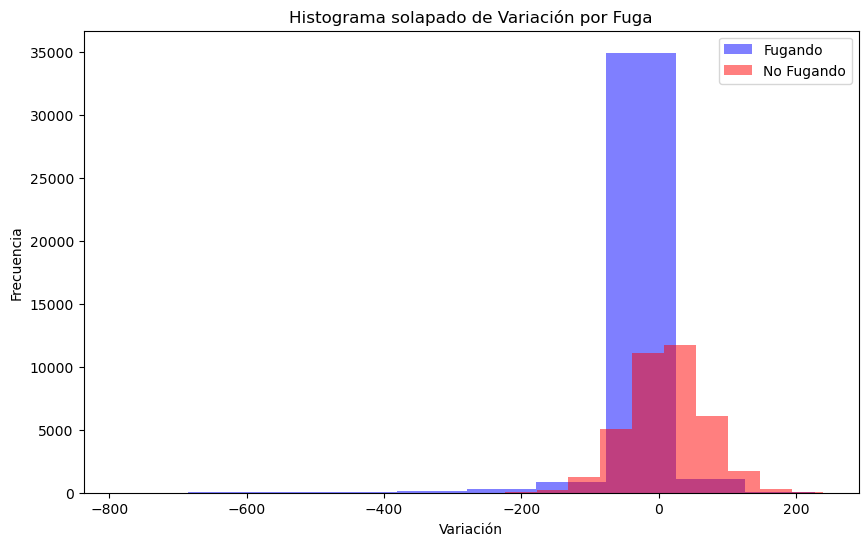

In [14]:
variacion_fuga_true = complete_train_data[complete_train_data['Fugando combustible'] == True]['Variacion']
variacion_fuga_false = complete_train_data[complete_train_data['Fugando combustible'] == False]['Variacion']

# Crear los histogramas solapados
plt.figure(figsize=(10, 6))

LAS_BINAS = 10

plt.hist(variacion_fuga_true, bins=LAS_BINAS, alpha=0.5, label='Fugando', color='blue')
plt.hist(variacion_fuga_false, bins=LAS_BINAS, alpha=0.5, label='No Fugando', color='red')

# Añadir título y etiquetas
plt.title('Histograma solapado de Variación por Fuga')
plt.xlabel('Variación')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

## Implementación de modelos

### Definición de métricas

In [15]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

In [16]:
def performance_metrics(y_true, y_pred, leak_value = 0.013) -> dict:
    return {
        # Valor de referencia
            'leak_value': leak_value,
        # Metricas clasicas de ML
            'accuracy_score':   accuracy_score(y_true, y_pred),
            'f1_score':         f1_score(y_true, y_pred),
            'recall_score':     recall_score(y_true, y_pred),
            'precision_score':  precision_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
        # Metricas propias del problema
            'false_positives':  confusion_matrix(y_true, y_pred).ravel()[1],
            'leak_delay':       leak_detection_delay(y_true, y_pred),
            'leak_loss':        leak_detection_delay(y_true, y_pred) * leak_value * 60 * 24 if type(leak_value) != str else None
    }

### Modelo primitivo

In [17]:
class TrivialClassifier:
    def __init__(self, n_bins = 10) -> None:
        self.n_bins = n_bins

    
    def fit(self, D_train) -> None:
        fuga_true = D_train[D_train['Fugando combustible'] == True]['Variacion']
        fuga_false = D_train[D_train['Fugando combustible'] == False]['Variacion']

        def hist_list(subset):
            subset_linspace = np.linspace(min(subset), max(subset), self.n_bins)
            interv_count = [[subset_linspace[i], subset_linspace[i + 1], 0] for i in range(len(subset_linspace) - 1)]
            for value in subset:
                for element in interv_count:
                    if element[0] <= value < element[1]:
                        element[2] += 1
            interv_count[0][0] = float('-inf')
            interv_count[-1][1] = float('inf')
            return interv_count

        self.fuga_true_intervc = hist_list(fuga_true)
        self.fuga_false_intervc = hist_list(fuga_false)


    def predict(self, X_test) -> None:
        y_pred = []

        def find_interval_value(interv_count, selected_value):
            for (lower_bound, upper_bound, value) in interv_count:
                if lower_bound <= selected_value < upper_bound:
                    return value

        for value in X_test:
            true_value = find_interval_value(self.fuga_true_intervc, value)
            false_value = find_interval_value(self.fuga_false_intervc, value)

            y_pred.append(1 if true_value > false_value else 0)
        
        return y_pred


In [18]:
trv_model = TrivialClassifier(n_bins = 10)

trv_model.fit(complete_train_data)

y_pred = trv_model.predict(test_data[0][1]['Variacion'].to_list())

pd.DataFrame.from_records([
    performance_metrics(test_data[0][1]['Fugando combustible'], y_pred, 'unknown')
]).drop(columns='confusion_matrix')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.517387,0.674045,0.996008,0.509385,36046,0,None


In [19]:
pd.DataFrame.from_records([
    performance_metrics(the_x[1]['Fugando combustible'], trv_model.predict(the_x[1]['Variacion']), the_x[0])
    for the_x in segmented_test_data
]).drop(columns='confusion_matrix')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5080,0.665033,0.974850,0.504650,2397,0,0.0
1,0.054929,0.5174,0.673168,0.992016,0.509430,2393,0,0.0
2,0.096857,0.5154,0.673142,0.996008,0.508354,2413,0,0.0
3,0.138786,0.5162,0.673857,0.997605,0.508754,2413,0,0.0
4,0.180714,0.5156,0.672880,0.994411,0.508471,2408,0,0.0
5,0.222643,0.5208,0.675866,0.997206,0.511152,2389,0,0.0
6,0.264571,0.5166,0.673951,0.997206,0.508965,2410,0,0.0
7,0.306500,0.5158,0.674027,0.999202,0.508533,2419,0,0.0
8,0.348429,0.5214,0.676665,0.999601,0.511438,2392,0,0.0
9,0.390357,0.5202,0.676030,0.999202,0.510816,2397,0,0.0


### Modelos clásicos

In [20]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def train_classic_model(classifier_class, param_grid, train_data, cv = 5):
    param_pkl_path = f'{param_grids_path}/{classifier_class.__name__}.pkl'
    classifier = None
    X_train, y_train = train_data
    if os.path.exists(param_pkl_path):  # Param grid already known
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = classifier_class(**param_grid)
        classifier.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(
            estimator = classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train, y_train)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )
    return classifier

In [21]:
def test_classic_model(classifier, test_list) -> list[dict]:
    results = list()
    for (leak_value, test_data) in test_list:
        X_test = test_data.drop(columns='Fugando combustible')
        y_test = test_data['Fugando combustible']
        y_pred = classifier.predict(X_test)
        results.append(performance_metrics(y_test, y_pred, leak_value))
    return results

##### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = train_classic_model(RandomForestClassifier, rf_param_grid, train_data)

rf_seg_results = test_classic_model(rf_model, segmented_test_data)
rf_results = test_classic_model(rf_model, test_data)

##### Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb_model = train_classic_model(GaussianNB, gnb_param_grid, train_data)

gnb_seg_results = test_classic_model(gnb_model, segmented_test_data)
gnb_results = test_classic_model(gnb_model, test_data)

##### KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = train_classic_model(KNeighborsClassifier, knn_param_grid, train_data)

knn_seg_results = test_classic_model(knn_model, segmented_test_data)
knn_results = test_classic_model(knn_model, test_data)

##### XGBoost Classifier

In [25]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = train_classic_model(XGBClassifier, xgb_param_grid, train_data)

xgb_seg_results = test_classic_model(xgb_model, segmented_test_data)
xgb_results = test_classic_model(xgb_model, test_data)

##### _Ensemble Classifier_

In [26]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[
        # NOTE: Podría ponerle los hiperparámetros ideales 
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

vot_model.fit(train_data[0], train_data[1])

vot_seg_results = test_classic_model(vot_model, segmented_test_data)
vot_results = test_classic_model(vot_model, test_data)

### Modelos _Deep Learning_

In [27]:
def test_dl_model(model, test_list):
    result_list = []
    for leak_value, test_dataframe in test_list:
        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        result_list.append(performance_metrics(y_test, y_pred, leak_value))

    return result_list

#### Único modelo de _Deep Learning_

In [28]:
X_train, y_train = train_data

##### Modelo unicapa

In [29]:
unil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

unil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = unil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_unil_seg_results = test_dl_model(unil_model, segmented_test_data)
dl_unil_results = test_dl_model(unil_model, test_data)

##### Modelo multicapa

In [30]:
multil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

multil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = multil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_multil_seg_results = test_dl_model(multil_model, segmented_test_data)
dl_multil_results = test_dl_model(multil_model, test_data)

#### Múltiples modelos de _Deep Learning_

In [31]:
dl_multim_seg_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_seg_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

In [32]:
dl_multim_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = test_data[0][0]

    X_test = test_data[0][1].drop(columns='Fugando combustible')
    y_test = test_data[0][1]['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

#### Modelo _ensemble_ de mini\_modelos de _Deep Learning_

In [33]:
from scipy.stats import mode

class HomebrewEnsembleClassifier:
    def __init__(self, model_list) -> None:
        self.model_list = model_list
    
    def predict(self, X_input, verbose = 0) -> np.ndarray:
        prediction_list = [model.predict(X_input, verbose=verbose) for model in self.model_list]
        ensemble_predictions, _ = mode(prediction_list, axis=0)
        return ensemble_predictions.ravel()

In [34]:
from tensorflow.keras.models import load_model

pkl_model_dir = '../../pkl/models'

model_list = [load_model(f'{pkl_model_dir}/{filename}') for filename in os.listdir(pkl_model_dir)]

dl_vot_model = HomebrewEnsembleClassifier(model_list)

In [35]:
dl_vot_seg_results = test_dl_model(dl_vot_model, segmented_test_data)
dl_vot_results = test_dl_model(dl_vot_model, test_data)

## Visualización de resultados

### Tablas de resultados

In [36]:
def display_result_table(results, name) -> None:
    df_chikito = pd.DataFrame.from_records(results).drop(columns='confusion_matrix')

    display(pd.DataFrame.from_records(results).drop(columns='confusion_matrix'))

    df_chikito.columns = [column.replace('_', '\\_') for column in df_chikito.columns]

    df_chikito.to_latex(
        f'../../docs/latex/{name.replace(" ", "_")}_table.tex',
        index = False,
        float_format = '%.4f'
    )

#### _Random Forest Classifier_

In [38]:
display_result_table(rf_seg_results, 'Random Forest')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5092,0.337831,0.249900,0.521232,575,14,262.080000
1,0.054929,0.7534,0.750657,0.740918,0.760656,584,7,553.680000
2,0.096857,0.7992,0.805577,0.830339,0.782249,579,4,557.897143
3,0.138786,0.8132,0.824238,0.874251,0.779637,619,1,199.851429
4,0.180714,0.8302,0.841041,0.896607,0.791961,590,0,0.000000
5,0.222643,0.8352,0.846441,0.906587,0.793778,590,1,320.605714
6,0.264571,0.8388,0.850019,0.911776,0.796096,585,1,380.982857
7,0.306500,0.8396,0.851811,0.920160,0.792914,602,0,0.000000
8,0.348429,0.8476,0.858627,0.923752,0.802080,571,0,0.000000
9,0.390357,0.8436,0.857247,0.937325,0.789775,625,0,0.000000


In [39]:
display_result_table(rf_results, 'Random Forest General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.81028,0.819027,0.8569,0.784361,8852,14,None


#### _Naive Bayes Classifier_

In [40]:
display_result_table(gnb_seg_results, 'Gaussian NB')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5314,0.559338,0.593613,0.528805,1325,1,18.720000
1,0.054929,0.6896,0.745824,0.908982,0.632324,1324,0,0.000000
2,0.096857,0.7046,0.762807,0.948104,0.638098,1347,0,0.000000
3,0.138786,0.7154,0.771699,0.960080,0.645118,1323,0,0.000000
4,0.180714,0.7170,0.772325,0.958084,0.646900,1310,0,0.000000
5,0.222643,0.7084,0.765217,0.948503,0.641296,1329,0,0.000000
6,0.264571,0.7140,0.769131,0.950898,0.645703,1307,0,0.000000
7,0.306500,0.7036,0.761583,0.944910,0.637833,1344,36,15888.960000
8,0.348429,0.6990,0.758698,0.944511,0.633976,1366,0,0.000000
9,0.390357,0.7060,0.765176,0.956088,0.637816,1360,34,19111.885714


In [41]:
display_result_table(gnb_results, 'Gaussian NB General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.696547,0.753245,0.924471,0.635534,19921,1,None


#### _KNN Classifier_

In [42]:
display_result_table(knn_seg_results, 'KNN')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5080,0.339420,0.252295,0.518458,587,4,74.880000
1,0.054929,0.7490,0.745384,0.733333,0.757838,587,0,0.000000
2,0.096857,0.7932,0.798205,0.816367,0.780832,574,4,557.897143
3,0.138786,0.7980,0.807619,0.846307,0.772313,625,0,0.000000
4,0.180714,0.8180,0.827455,0.871058,0.788010,587,0,0.000000
5,0.222643,0.8192,0.830712,0.885429,0.782363,617,1,320.605714
6,0.264571,0.8290,0.838831,0.888224,0.794643,575,1,380.982857
7,0.306500,0.8260,0.836466,0.888224,0.790409,590,0,0.000000
8,0.348429,0.8302,0.841041,0.896607,0.791961,590,0,0.000000
9,0.390357,0.8292,0.841852,0.907385,0.785147,622,0,0.000000


In [43]:
display_result_table(knn_results, 'KNN General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.798787,0.806245,0.835609,0.778875,8914,4,None


#### _XGBoost Classifier_

In [44]:
display_result_table(xgb_seg_results, 'XGBoost')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5120,0.337676,0.248303,0.527566,557,14,262.080000
1,0.054929,0.7528,0.749899,0.739721,0.760361,584,7,553.680000
2,0.096857,0.8016,0.807901,0.832735,0.784505,573,4,557.897143
3,0.138786,0.8122,0.822797,0.870259,0.780243,614,4,799.405714
4,0.180714,0.8294,0.840112,0.894611,0.791873,589,1,260.228571
5,0.222643,0.8354,0.846254,0.904192,0.795295,583,1,320.605714
6,0.264571,0.8448,0.855708,0.918563,0.800905,572,1,380.982857
7,0.306500,0.8410,0.853077,0.921357,0.794219,598,0,0.000000
8,0.348429,0.8478,0.858943,0.924950,0.801730,573,0,0.000000
9,0.390357,0.8458,0.858817,0.936128,0.793302,611,0,0.000000


In [45]:
display_result_table(xgb_results, 'XGBoost General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.811627,0.820177,0.857458,0.786002,8772,14,None


#### _Ensemble Classifier_

In [46]:
display_result_table(vot_seg_results, 'Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5086,0.337914,0.250299,0.519900,579,14,262.080000
1,0.054929,0.7472,0.742880,0.728942,0.757362,585,7,553.680000
2,0.096857,0.7918,0.796401,0.812774,0.780675,572,4,557.897143
3,0.138786,0.8030,0.812915,0.854291,0.775362,620,0,0.000000
4,0.180714,0.8192,0.828853,0.873852,0.788261,588,0,0.000000
5,0.222643,0.8212,0.832018,0.883832,0.785942,603,1,320.605714
6,0.264571,0.8296,0.838941,0.885828,0.796768,566,1,380.982857
7,0.306500,0.8250,0.835927,0.889820,0.788190,599,0,0.000000
8,0.348429,0.8350,0.845361,0.900200,0.796820,575,0,0.000000
9,0.390357,0.8354,0.847846,0.915369,0.789601,611,0,0.000000


In [47]:
display_result_table(vot_results, 'Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.800533,0.807677,0.836008,0.781204,8798,14,None


#### Modelo DL unicapa

In [48]:
display_result_table(dl_unil_seg_results, 'DL Unicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5116,0.370943,0.287425,0.522876,657,14,262.080000
1,0.054929,0.7538,0.760179,0.778842,0.742390,677,0,0.000000
2,0.096857,0.7956,0.807895,0.857884,0.763410,666,28,3905.280000
3,0.138786,0.7996,0.815809,0.885828,0.756048,716,56,11191.680000
4,0.180714,0.8108,0.826993,0.902595,0.763078,702,106,27584.228571
5,0.222643,0.8178,0.833911,0.912974,0.767450,693,91,29175.120000
6,0.264571,0.8248,0.839971,0.917764,0.774335,670,89,33907.474286
7,0.306500,0.8262,0.842029,0.924551,0.773031,680,90,39722.400000
8,0.348429,0.8310,0.846893,0.932934,0.775382,677,51,25588.594286
9,0.390357,0.8238,0.842650,0.941717,0.762443,735,89,50028.171429


In [49]:
display_result_table(dl_unil_results, 'DL Unicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.797573,0.811586,0.870206,0.760366,10305,14,None


#### Modelo DL multicapa

In [50]:
display_result_table(dl_multil_seg_results, 'DL Multicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5116,0.374167,0.291417,0.522548,667,14,262.080000
1,0.054929,0.7540,0.760979,0.781637,0.741386,683,0,0.000000
2,0.096857,0.7964,0.809077,0.861078,0.763000,670,28,3905.280000
3,0.138786,0.7986,0.815195,0.886627,0.754416,723,56,11191.680000
4,0.180714,0.8106,0.826969,0.903393,0.762466,705,106,27584.228571
5,0.222643,0.8176,0.833759,0.912974,0.767192,694,91,29175.120000
6,0.264571,0.8240,0.839767,0.920559,0.772012,681,89,33907.474286
7,0.306500,0.8246,0.841037,0.926148,0.770252,692,90,39722.400000
8,0.348429,0.8314,0.847641,0.936128,0.774439,683,51,25588.594286
9,0.390357,0.8226,0.841918,0.942914,0.760464,744,89,50028.171429


In [51]:
display_result_table(dl_multil_results, 'DL Multicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.797173,0.811616,0.872096,0.758981,10406,14,None


#### Modelo DL multiple

In [52]:
display_result_table(dl_multim_seg_results, 'DL Multimodelo')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.5164,0.501032,0.484631,0.518582,1127,1,18.720000
1,0.054929,0.7526,0.756064,0.765269,0.747077,649,0,0.000000
2,0.096857,0.7372,0.738143,0.739321,0.736968,661,28,3905.280000
3,0.138786,0.7976,0.805310,0.835529,0.777200,600,56,11191.680000
4,0.180714,0.8158,0.828332,0.887026,0.776923,638,106,27584.228571
5,0.222643,0.7072,0.707317,0.706188,0.708450,728,91,29175.120000
6,0.264571,0.7248,0.669866,0.557285,0.839447,267,89,33907.474286
7,0.306500,0.6804,0.582331,0.444711,0.843301,207,110,48549.600000
8,0.348429,0.7674,0.775613,0.802395,0.750560,668,51,25588.594286
9,0.390357,0.7532,0.740429,0.702595,0.782570,489,89,50028.171429


In [53]:
display_result_table(dl_multim_results, 'DL Multimodelo General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.545200,0.524917,0.501504,0.550624,15379,1,None
1,unknown,0.551960,0.537601,0.519867,0.556588,15562,1,None
2,unknown,0.667400,0.613741,0.527425,0.733837,7188,21,None
3,unknown,0.600120,0.691847,0.895995,0.563464,26083,0,None
4,unknown,0.791920,0.796834,0.814478,0.779938,8635,14,None
5,unknown,0.758573,0.737698,0.677631,0.809448,5994,14,None
6,unknown,0.640893,0.722355,0.932428,0.589534,24394,1,None
7,unknown,0.470093,0.636755,0.927053,0.484910,37002,0,None
8,unknown,0.555040,0.644601,0.805429,0.537310,26061,0,None
9,unknown,0.703253,0.758213,0.928703,0.640611,19577,1,None


#### Modelo DL _ensemble_

In [54]:
display_result_table(dl_vot_seg_results, 'DL Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.4990,0.061446,0.032735,0.500000,82,30,561.600000
1,0.054929,0.5564,0.258690,0.154491,0.794661,100,7,553.680000
2,0.096857,0.5688,0.283721,0.170459,0.845545,78,28,3905.280000
3,0.138786,0.5754,0.302333,0.183633,0.855019,78,80,15988.114286
4,0.180714,0.5766,0.308848,0.188822,0.847670,85,199,51785.485714
5,0.222643,0.5810,0.322226,0.198802,0.849829,88,108,34625.417143
6,0.264571,0.5796,0.311722,0.190020,0.867031,73,137,52194.651429
7,0.306500,0.5748,0.302035,0.183633,0.850277,81,96,42370.560000
8,0.348429,0.5826,0.326122,0.201597,0.853041,87,82,41142.445714
9,0.390357,0.5798,0.322477,0.199601,0.838926,96,91,51152.400000


In [55]:
display_result_table(dl_vot_results, 'DL Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.57372,0.300278,0.182568,0.845244,1256,30,None


### Matrices de confusión

In [56]:
def display_conf_matrix(confusion_matrix, name):
    disp = ConfusionMatrixDisplay(
        confusion_matrix,
        display_labels=['No fuga', 'Fuga']
    ).plot(colorbar=False)

    plt.title(f'Resultados de {name}', fontsize=14)

    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.ylabel('Etiqueta Verdadera', fontsize=12)

    for text in disp.text_.ravel():
        text.set_fontsize(11)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(
        f'../../docs/media/cm_{name.replace(" ", "_")}.eps',
        format='eps'    
    )

#### _Random Forest Classifier_

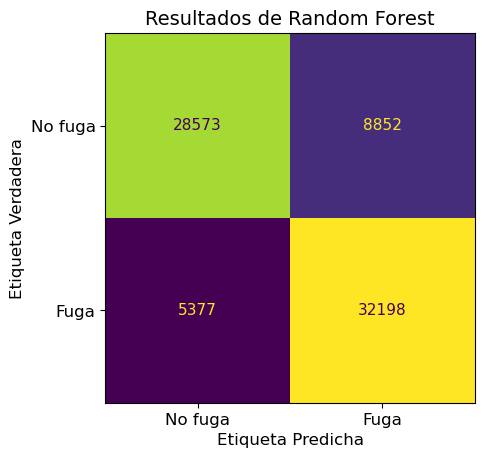

In [57]:
display_conf_matrix(rf_results[0]['confusion_matrix'], 'Random Forest')

#### _Gaussian NB Classifier_

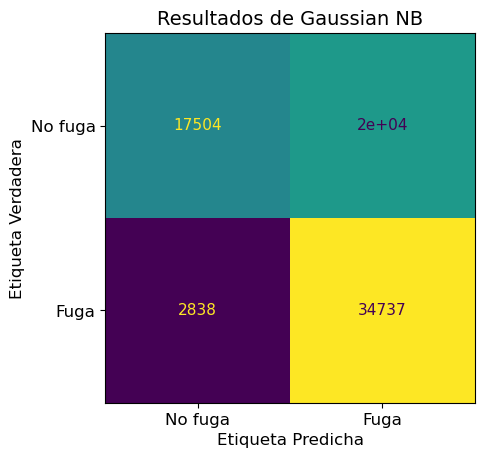

In [58]:
display_conf_matrix(gnb_results[0]['confusion_matrix'], 'Gaussian NB')

#### _KNN Classifier_

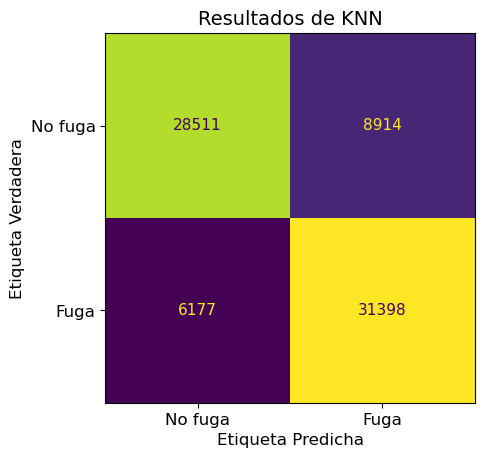

In [59]:
display_conf_matrix(knn_results[0]['confusion_matrix'], 'KNN')

#### _XGBoost Classifier_

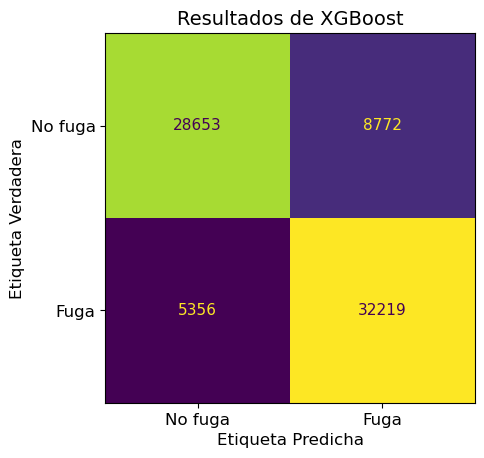

In [60]:
display_conf_matrix(xgb_results[0]['confusion_matrix'], 'XGBoost')

#### _Ensemble Classifier_

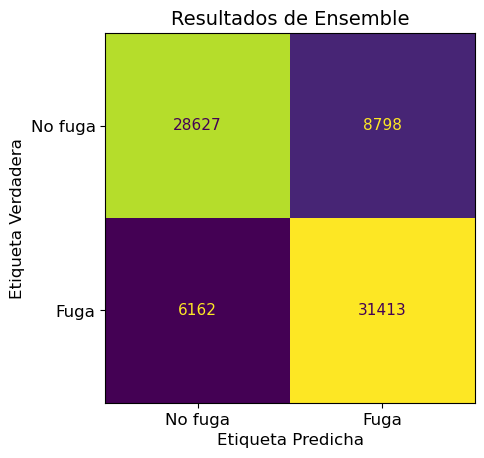

In [61]:
display_conf_matrix(vot_results[0]['confusion_matrix'], 'Ensemble')

#### Modelo DL unicapa

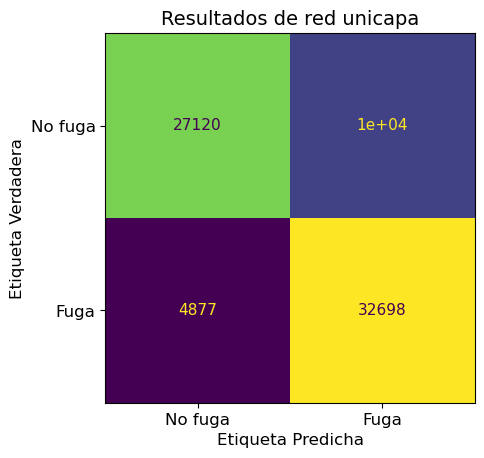

In [62]:
display_conf_matrix(dl_unil_results[0]['confusion_matrix'], 'red unicapa')

#### Modelo DL multicapa

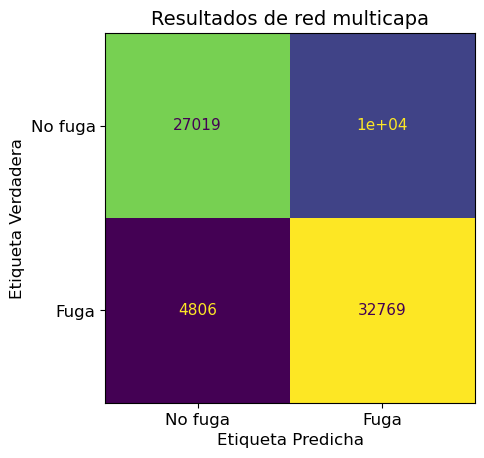

In [63]:
display_conf_matrix(dl_multil_results[0]['confusion_matrix'], 'red multicapa')

#### Modelo DL _ensemble_

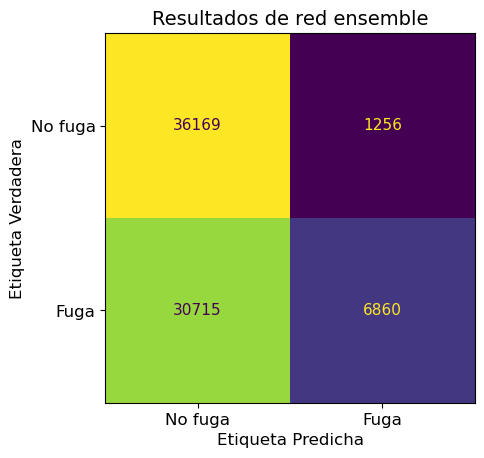

In [64]:
display_conf_matrix(dl_vot_results[0]['confusion_matrix'], 'red ensemble')

### Otros

In [65]:
display_seg_list = [
    ('Random Forest',   rf_seg_results),
    ('Gaussian NB',     gnb_seg_results),
    ('KNN',             knn_seg_results),
    ('XGBoost',         xgb_seg_results),
    ('Ensemble',        vot_seg_results),
    ('DL unilayer',     dl_unil_seg_results),
    ('DL multilayer',   dl_multil_seg_results),
    ('DL ensemble',     dl_vot_seg_results)
]

In [66]:
display_list = [
    ('Random Forest',   rf_results),
    ('Gaussian NB',     gnb_results),
    ('KNN',             knn_results),
    ('XGBoost',         xgb_results),
    ('Ensemble',        vot_results),
    ('DL unilayer',     dl_unil_results),
    ('DL multilayer',   dl_multil_results),
    ('DL ensemble',     dl_vot_results)
]

#### Comparativa de falsos positivos

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


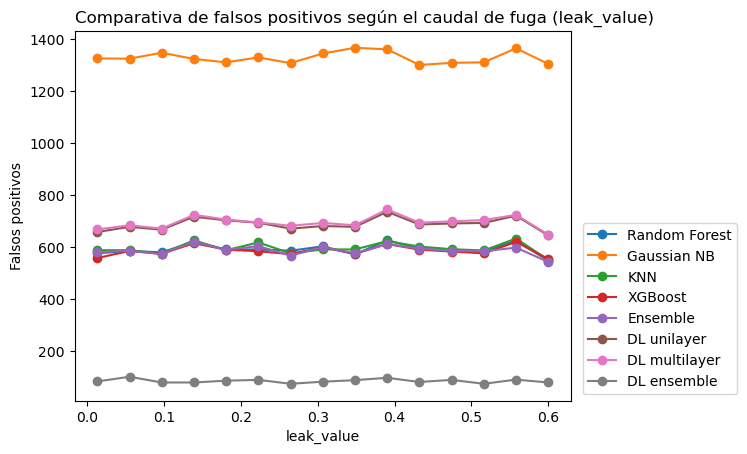

In [67]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['false_positives'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de falsos positivos según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Falsos positivos')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_falsos_positivos.eps', format='eps')

plt.show()

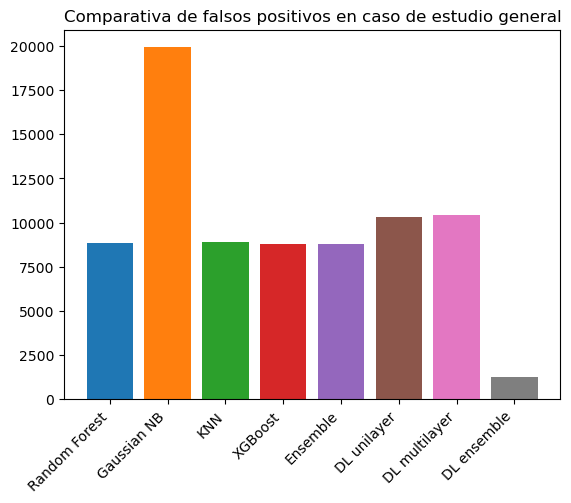

In [68]:
for (name, results) in display_list:
    plt.bar(name, results[0]['false_positives'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de falsos positivos en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_falsos_positivos_g.eps', format='eps')

plt.show()

#### Comparativa de sensibilidad (_recall_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


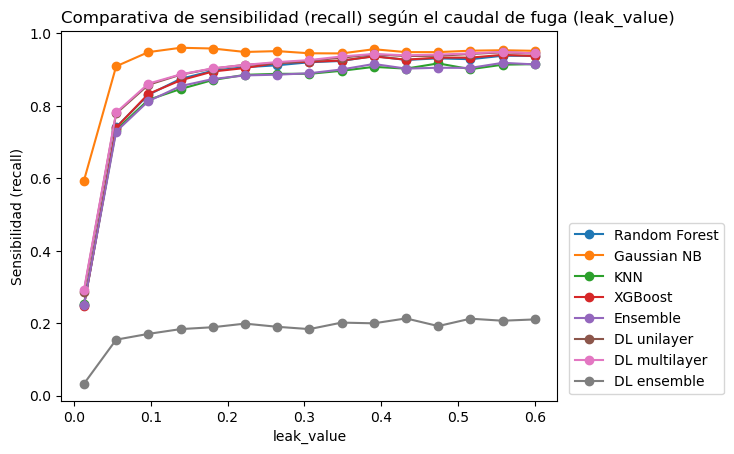

In [69]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['recall_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de sensibilidad (recall) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Sensibilidad (recall)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_recall.eps', format='eps')

plt.show()

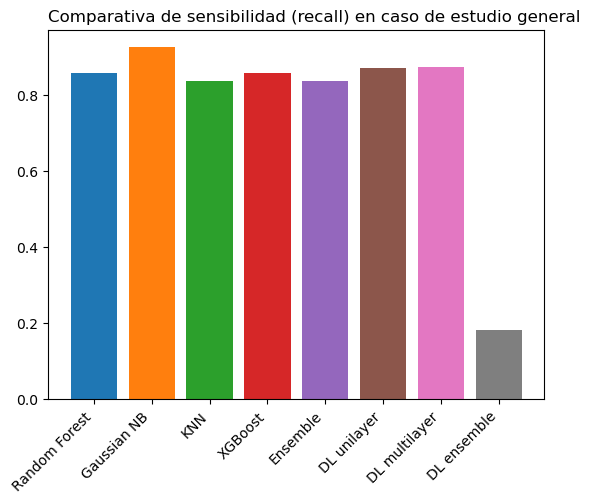

In [70]:
for (name, results) in display_list:
    plt.bar(name, results[0]['recall_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de sensibilidad (recall) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_recall_g.eps', format='eps')

plt.show()

#### Comparativa de exactitud (_accuracy_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


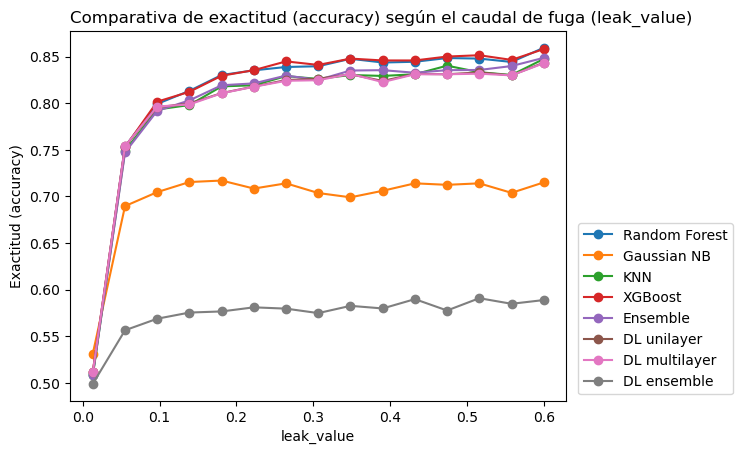

In [71]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['accuracy_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de exactitud (accuracy) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Exactitud (accuracy)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_accuracy.eps', format='eps')

plt.show()

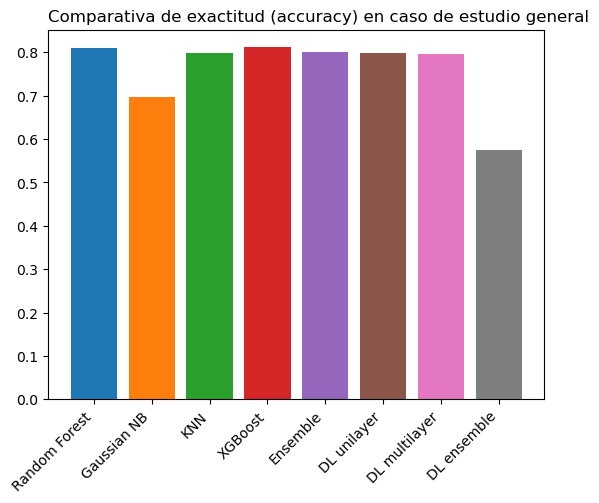

In [72]:
for (name, results) in display_list:
    plt.bar(name, results[0]['accuracy_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de exactitud (accuracy) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_accuracy_g.eps', format='eps')

plt.show()

#### Comparativa de días hasta detección de fuga 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


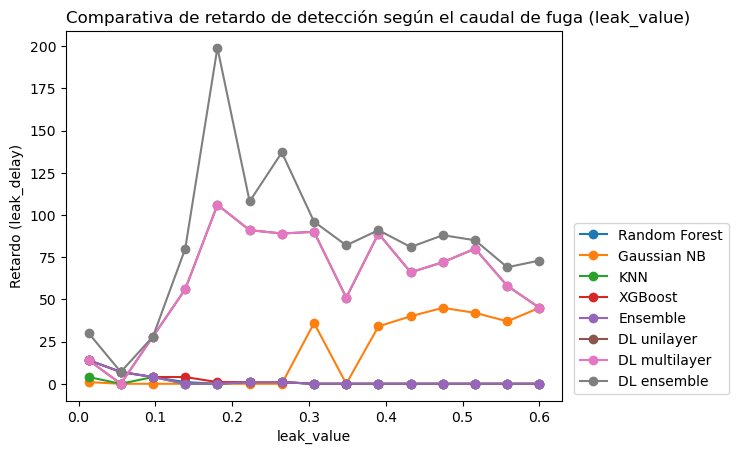

In [73]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['leak_delay'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de retardo de detección según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Retardo (leak_delay)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_leak_delay.eps', format='eps')

plt.show()

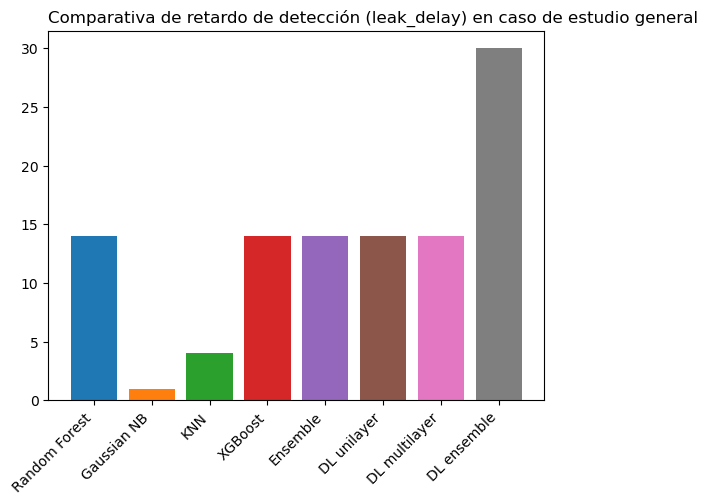

In [74]:
for (name, results) in display_list:
    plt.bar(name, results[0]['leak_delay'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de retardo de detección (leak_delay) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_leak_delay_g.eps', format='eps')

plt.show()